# Python mapping libraries

## Introduction

This notebook is inspired by the article ["6 python libraries to make beautiful maps"](https://medium.com/@alexroz/6-python-libraries-to-make-beautiful-maps-9fb9edb28b27) by Aleksei Rozanov, published in [Medium](https://medium.com/) in 2024.

You'll be guided through python mapping libraries: packages that visualize spatial data on a map. You will get familiar with several options how to display your spatial data either on a static picture map or on an interactive map.

These are the covered libraries:
- [Cartopy](#cartopy)
- [Folium](#folium)
- [Plotly](#plotly)
- [ipyleaflet](#ipyleaflet)
- [Geemap](#geemap)
- [Ridgemap](#ridgemap)

In [19]:
import requests
import os
import geopandas

In [40]:
# URL of the NUTS0 geojson to download
url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_01M_2021_4326_LEVL_0.geojson"

# NUTS0 regions will be downloaded in 1:1 000 000 scale resolution, valid for the year 2021 and in EPSG:4326 crs (WGS 84)
file_name = "NUTS_RG_01M_2021_4326_LEVL_0.geojson"

# os.getcwd() returns the path to the current directory => the directory where this notebook is
cwd = os.getcwd() + "/"

# set your own path where you want to save the geojson, it's recommended to save it in the same directory as this notebook is
file_path = os.path.join(cwd, file_name)

In [41]:
if os.path.exists(file_path):
    print("NUTS0 geojson file has already been downloaded.")
else:
    # object response contains the result of the GET request to the specified URL
    response = requests.get(url)

    if response.status_code == 200:
        # write the content to a file
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"File '{file_name}' downloaded successfully!")
    else:
        print("Failed to download the file.")

NUTS0 geojson file has already been downloaded.


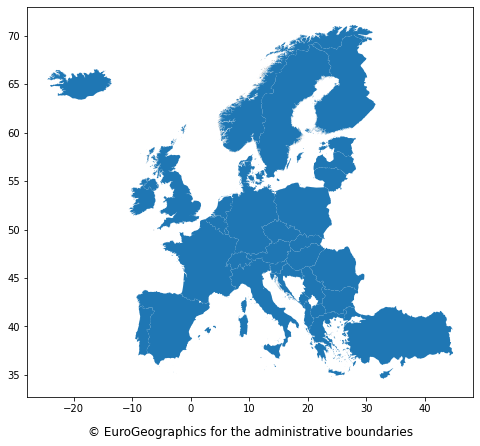

In [42]:
gdf_from_geojson = geopandas.read_file(file_path)
nuts0_exploded = gdf_from_geojson.explode(index_parts=True)
nuts0_gdf = nuts0_exploded.cx[-15:, 34:70]
nuts0_gdf = nuts0_gdf.dissolve(by="NAME_LATN")
ax = nuts0_gdf.plot(figsize=(8, 8))
_ = ax.set_xlabel('© EuroGeographics for the administrative boundaries', fontsize = 12, labelpad = 12.0)

## Cartopy <a id="cartopy"></a>

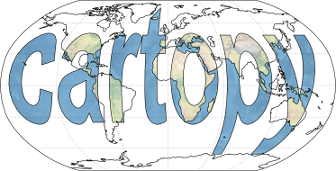

In [57]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib_scalebar.scalebar import ScaleBar

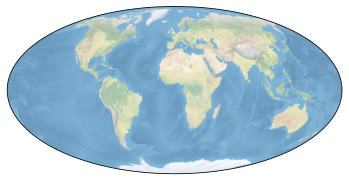

In [48]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

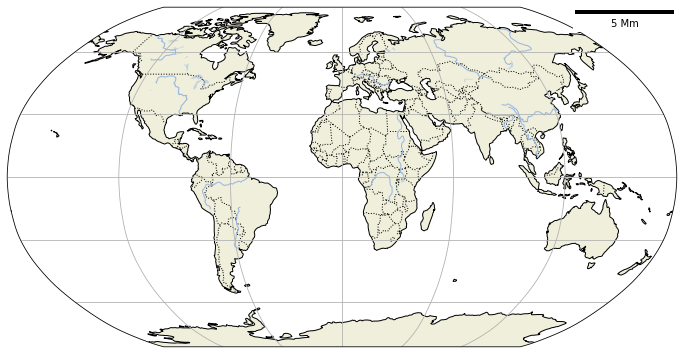

In [66]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines()
ax.add_artist(ScaleBar(0.001, "km"))

plt.show()

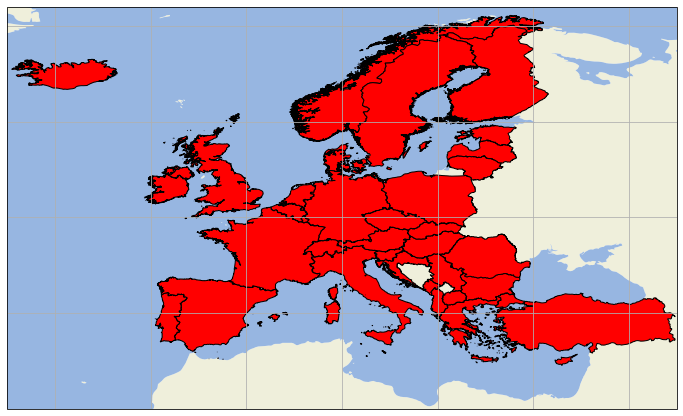

In [54]:
# Create a Cartopy map projection
projection = ccrs.PlateCarree()

# Create a figure and axis with the desired projection
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(12,8))

# Set the extent of the map (optional)
ax.set_extent([-25, 45, 30, 72], crs=projection)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Add your GeoDataFrame to the map
ax.add_geometries(nuts0_gdf['geometry'], crs=projection, edgecolor='black', facecolor='red')

# Customize the appearance of the map
#ax.coastlines()
ax.gridlines()

scale_bar = scalebar.ScaleBar(1000, location='lower center')  # 1000 km scale bar
ax.add_artist(scale_bar)

# Show the map
plt.show()

## Folium <a id="folium"></a>

## Plotly <a id="plotly"></a>

## ipyleaflet <a id="ipyleaflet"></a>

## Geemap <a id="geemap"></a>

## Ridgemap <a id="ridgemap"></a>